In [1]:
# Import the depemdencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

hermanus za
punta arenas cl
rikitea pf
noumea nc
bo phloi th
yulara au
kavieng pg
misratah ly
ushuaia ar
ust-kuyga ru
souillac mu
lucapa ao
butaritari ki
corbelia br
yining cn
tabiauea ki
bambous virieux mu
busselton au
rikitea pf
salekhard ru
punta arenas cl
faanui pf
kodiak us
pevek ru
dingle ie
arrecife es
casteltermini it
berdigestyakh ru
kavieng pg
ormond beach us
albany au
khatanga ru
rikitea pf
barrow us
la ronge ca
panjab af
qaanaaq gl
busselton au
busselton au
rikitea pf
bara sd
atuona pf
half moon bay us
upernavik gl
rikitea pf
jaumave mx
dikson ru
chuy uy
vaini to
carnarvon au
peleduy ru
marzuq ly
amderma ru
severo-kurilsk ru
juneau us
suzun ru
faya td
bowen au
awjilah ly
mar del plata ar
faya td
jamestown sh
formoso do araguaia br
jamestown sh
upernavik gl
tete mz
guiratinga br
los llanos de aridane es
ngukurr au
taoudenni ml
bucerias mx
emiliano zapata mx
ribeira grande pt
khatanga ru
coihaique cl
jamestown sh
ardistan ir
ostrovnoy ru
andros town bs
new norfolk au
samusu w

ushuaia ar
tasiilaq gl
esperance au
vaini to
portland au
geraldton au
rikitea pf
punta arenas cl
atasu kz
urazovka ru
yulara au
susanville us
tarudant ma
barentsburg sj
punta arenas cl
tasiilaq gl
roma au
garissa ke
busselton au
namibe ao
lompoc us
kavieng pg
mataura pf
hilo us
port elizabeth za
arraial do cabo br
pevek ru
altay cn
olinda br
atuona pf
albany au
doha qa
kodiak us
vaini to
tabukiniberu ki
gorahun sl
ambilobe mg
kaabong ug
lebu cl
yeppoon au
new plymouth nz
astaneh-ye ashrafiyeh ir
bolungarvik is
smidovich ru
mataura pf
saint-paul re
punta arenas cl
kirakira sb
kargasok ru
vanimo pg
kapaa us
zanesville us
jamestown sh
berdigestyakh ru
yellowknife ca
cherskiy ru
ushuaia ar
mys shmidta ru
hami cn
hermanus za
trojes hn
mataura pf
mataura pf
nola cf
mount gambier au
qaanaaq gl
saint-philippe re
kununurra au
ushuaia ar
ler sd
nizhniy kuranakh ru
szecseny hu
langxiang cn
sao jose da coroa grande br
nicoya cr
bara sd
urengoy ru
mataura pf
souillac mu
kapaa us
albany au
nyzhni si

punta arenas cl
rikitea pf
havoysund no
goure ne
kapaa us
hithadhoo mv
punta arenas cl
chapais ca
vaini to
kapaa us
mehamn no
cockburn harbour tc
bengkulu id
sitka us
husavik is
tsihombe mg
ust-kamchatsk ru
vaini to
kirensk ru
gigmoto ph
bambui br
marienberg de
banda aceh id
narok ke
ornskoldsvik se
mar del plata ar
iskateley ru
bethel us
umzimvubu za
mubi ng
geraldton au
venice us
nouadhibou mr
albany au
hobart au
yulara au
mehamn no
bardiyah ly
qaanaaq gl
cape town za
faya td
norman wells ca
adrar dz
kaitangata nz
coihaique cl
atuona pf
tadine nc


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count 
len(cities)

622

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1088b1d6129e9db5f71629001500e370


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime                                                                                                                                                                        

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 1 | hermanus
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | punta arenas
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | rikitea
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | noumea
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | bo phloi
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | yulara
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | kavieng
-----------------------------
Data Retrieval Complete      
-----------------------------
Pr

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 2 | coihaique
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 2 | ardistan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 2 | ostrovnoy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 2 | andros town
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 2 | new norfolk
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 2 | samusu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 2 | vostok
-----------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 3 | merauke
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 3 | ashqelon
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 3 | mangrol
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 3 | port alfred
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 3 | hobart
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 3 | kambove
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 3 | henties bay
-----------------------------
Data Retrieval Complete      
----------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 4 | ancud
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 4 | karaton
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 4 | tortosa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 4 | oktyabrskoye
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 4 | nome
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 4 | ndjole
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 4 | wanning
-----------------------------
Data Retrieval Complete      
-----------------------------
P

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 5 | sioux lookout
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 5 | walvis bay
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 6 | lusambo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 6 | thompson
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 6 | hasaki
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 6 | anadyr
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 6 | castro
-----------------------------
Data Retrieval Complete      
----------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 7 | eirunepe
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 7 | ketchikan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 7 | kahului
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 7 | mirnyy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 7 | lagunas
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 7 | pirai do sul
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 7 | namibe
-----------------------------
Data Retrieval Complete      
------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 8 | urazovka
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 8 | susanville
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 8 | tarudant
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 8 | roma
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 8 | garissa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 8 | altay
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 8 | doha
City not found. Skipping...
-----------------------------
Data Re

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 9 | axim
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 9 | tessalit
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 9 | valle de allende
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 9 | oum hadjer
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 9 | huzhou
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 9 | eenhana
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 9 | springfield
-----------------------------
Data Retrieval Complete      
-----------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 10 | son la
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 10 | petropavlovsk-kamchatskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 10 | chuncheng
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 11 | eyl
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 11 | wamba
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 11 | kendari
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 11 | neryungri
-----------------------------
Data Retrieval Complete      
------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 12 | itoman
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 12 | pochutla
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 12 | san francisco del mar
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 12 | villamontes
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 12 | fairbanks
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 12 | falealupo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 12 | banda aceh
-----------------------------
D

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 13 | bardiyah
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 13 | adrar
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 22 of Set 13 | tadine


In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,64.00,87,99,11.01,ZA,2021-03-20 01:06:23
1,Punta Arenas,-53.1500,-70.9167,41.00,87,75,39.12,CL,2021-03-20 01:06:24
2,Rikitea,-23.1203,-134.9692,81.12,75,100,9.84,PF,2021-03-20 01:05:19
3,Noumea,-22.2763,166.4572,82.99,61,75,9.22,NC,2021-03-20 01:02:24
4,Bo Phloi,14.3236,99.5161,87.01,46,1,4.85,TH,2021-03-20 01:06:24
5,Yulara,-25.2406,130.9889,75.20,38,75,13.80,AU,2021-03-20 01:06:24
6,Kavieng,-2.5744,150.7967,85.93,66,40,7.14,PG,2021-03-20 01:06:25
7,Misratah,32.3754,15.0925,61.38,74,0,5.48,LY,2021-03-20 01:06:25
8,Ushuaia,-54.8000,-68.3000,44.60,65,75,31.07,AR,2021-03-20 01:01:32
9,Ust-Kuyga,70.0167,135.6000,-4.41,86,100,5.50,RU,2021-03-20 01:06:25


In [13]:

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2021-03-20 01:06:23,-34.4187,19.2345,64.00,87,99,11.01
1,Punta Arenas,CL,2021-03-20 01:06:24,-53.1500,-70.9167,41.00,87,75,39.12
2,Rikitea,PF,2021-03-20 01:05:19,-23.1203,-134.9692,81.12,75,100,9.84
3,Noumea,NC,2021-03-20 01:02:24,-22.2763,166.4572,82.99,61,75,9.22
4,Bo Phloi,TH,2021-03-20 01:06:24,14.3236,99.5161,87.01,46,1,4.85
5,Yulara,AU,2021-03-20 01:06:24,-25.2406,130.9889,75.20,38,75,13.80
6,Kavieng,PG,2021-03-20 01:06:25,-2.5744,150.7967,85.93,66,40,7.14
7,Misratah,LY,2021-03-20 01:06:25,32.3754,15.0925,61.38,74,0,5.48
8,Ushuaia,AR,2021-03-20 01:01:32,-54.8000,-68.3000,44.60,65,75,31.07
9,Ust-Kuyga,RU,2021-03-20 01:06:25,70.0167,135.6000,-4.41,86,100,5.50


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

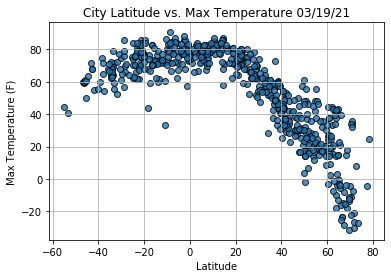

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

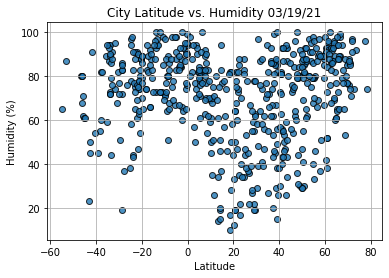

In [17]:
# Build the scatter plot for latitude vs.humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

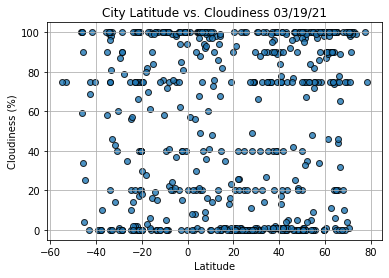

In [18]:
# Build the scatter plot for latitude vs.cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

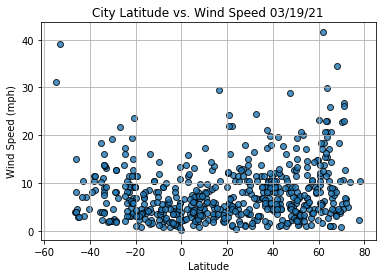

In [19]:
# Build the scatter plot for latitude vs.wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

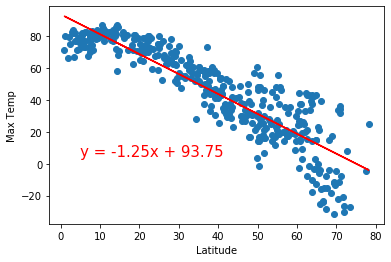

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,5))


In [23]:
lr_stat = linregress(x_values, y_values)
lr_stat

LinregressResult(slope=-1.2494211442294394, intercept=93.74838376615175, rvalue=-0.8881486196947409, pvalue=4.2780789712264786e-134, stderr=0.03269441636714609)

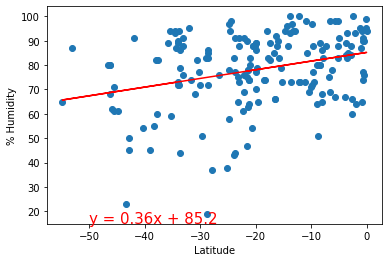

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))